# Predicting the personal loan borrowers for Thera Bank 

In [1]:
#Importing relevant Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',sheet_name='Data')

In [3]:
data.shape

(5000, 14)

In [4]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# We can drop the Column ID since its not relevent:
data.drop("ID", axis=1,inplace=True)

In [6]:
data.shape

(5000, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [8]:
data.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## 1) Read the column description and ensure you understand each attribute well.
        The Dataset has 13 columns 5000 rows, its a good representation of population:
        
        Out of 13 Columns, "Personal Loan" is the target variable and remaining 12 are independent attributes:
        1) Age,Experience,Income,Zip Code, Family and Education: These coulmns represent customer demographic information.
        2) CCAvg, Mortgage, Personal Loan, Securities Account, CD Account, Online, Creditcard: These columns represent customers         relationship with bank.
        Categorical Variables: The columns Family,Education, Personal Loan, Securities Account, CD Account, Online and                   CreditCard are categorical variables.
        Expercience: The variable Experience is having Negative values.
        Income,CCAvg and Mortgage: These three columns have skewed distribution and there might be few outliers.
        
        
        

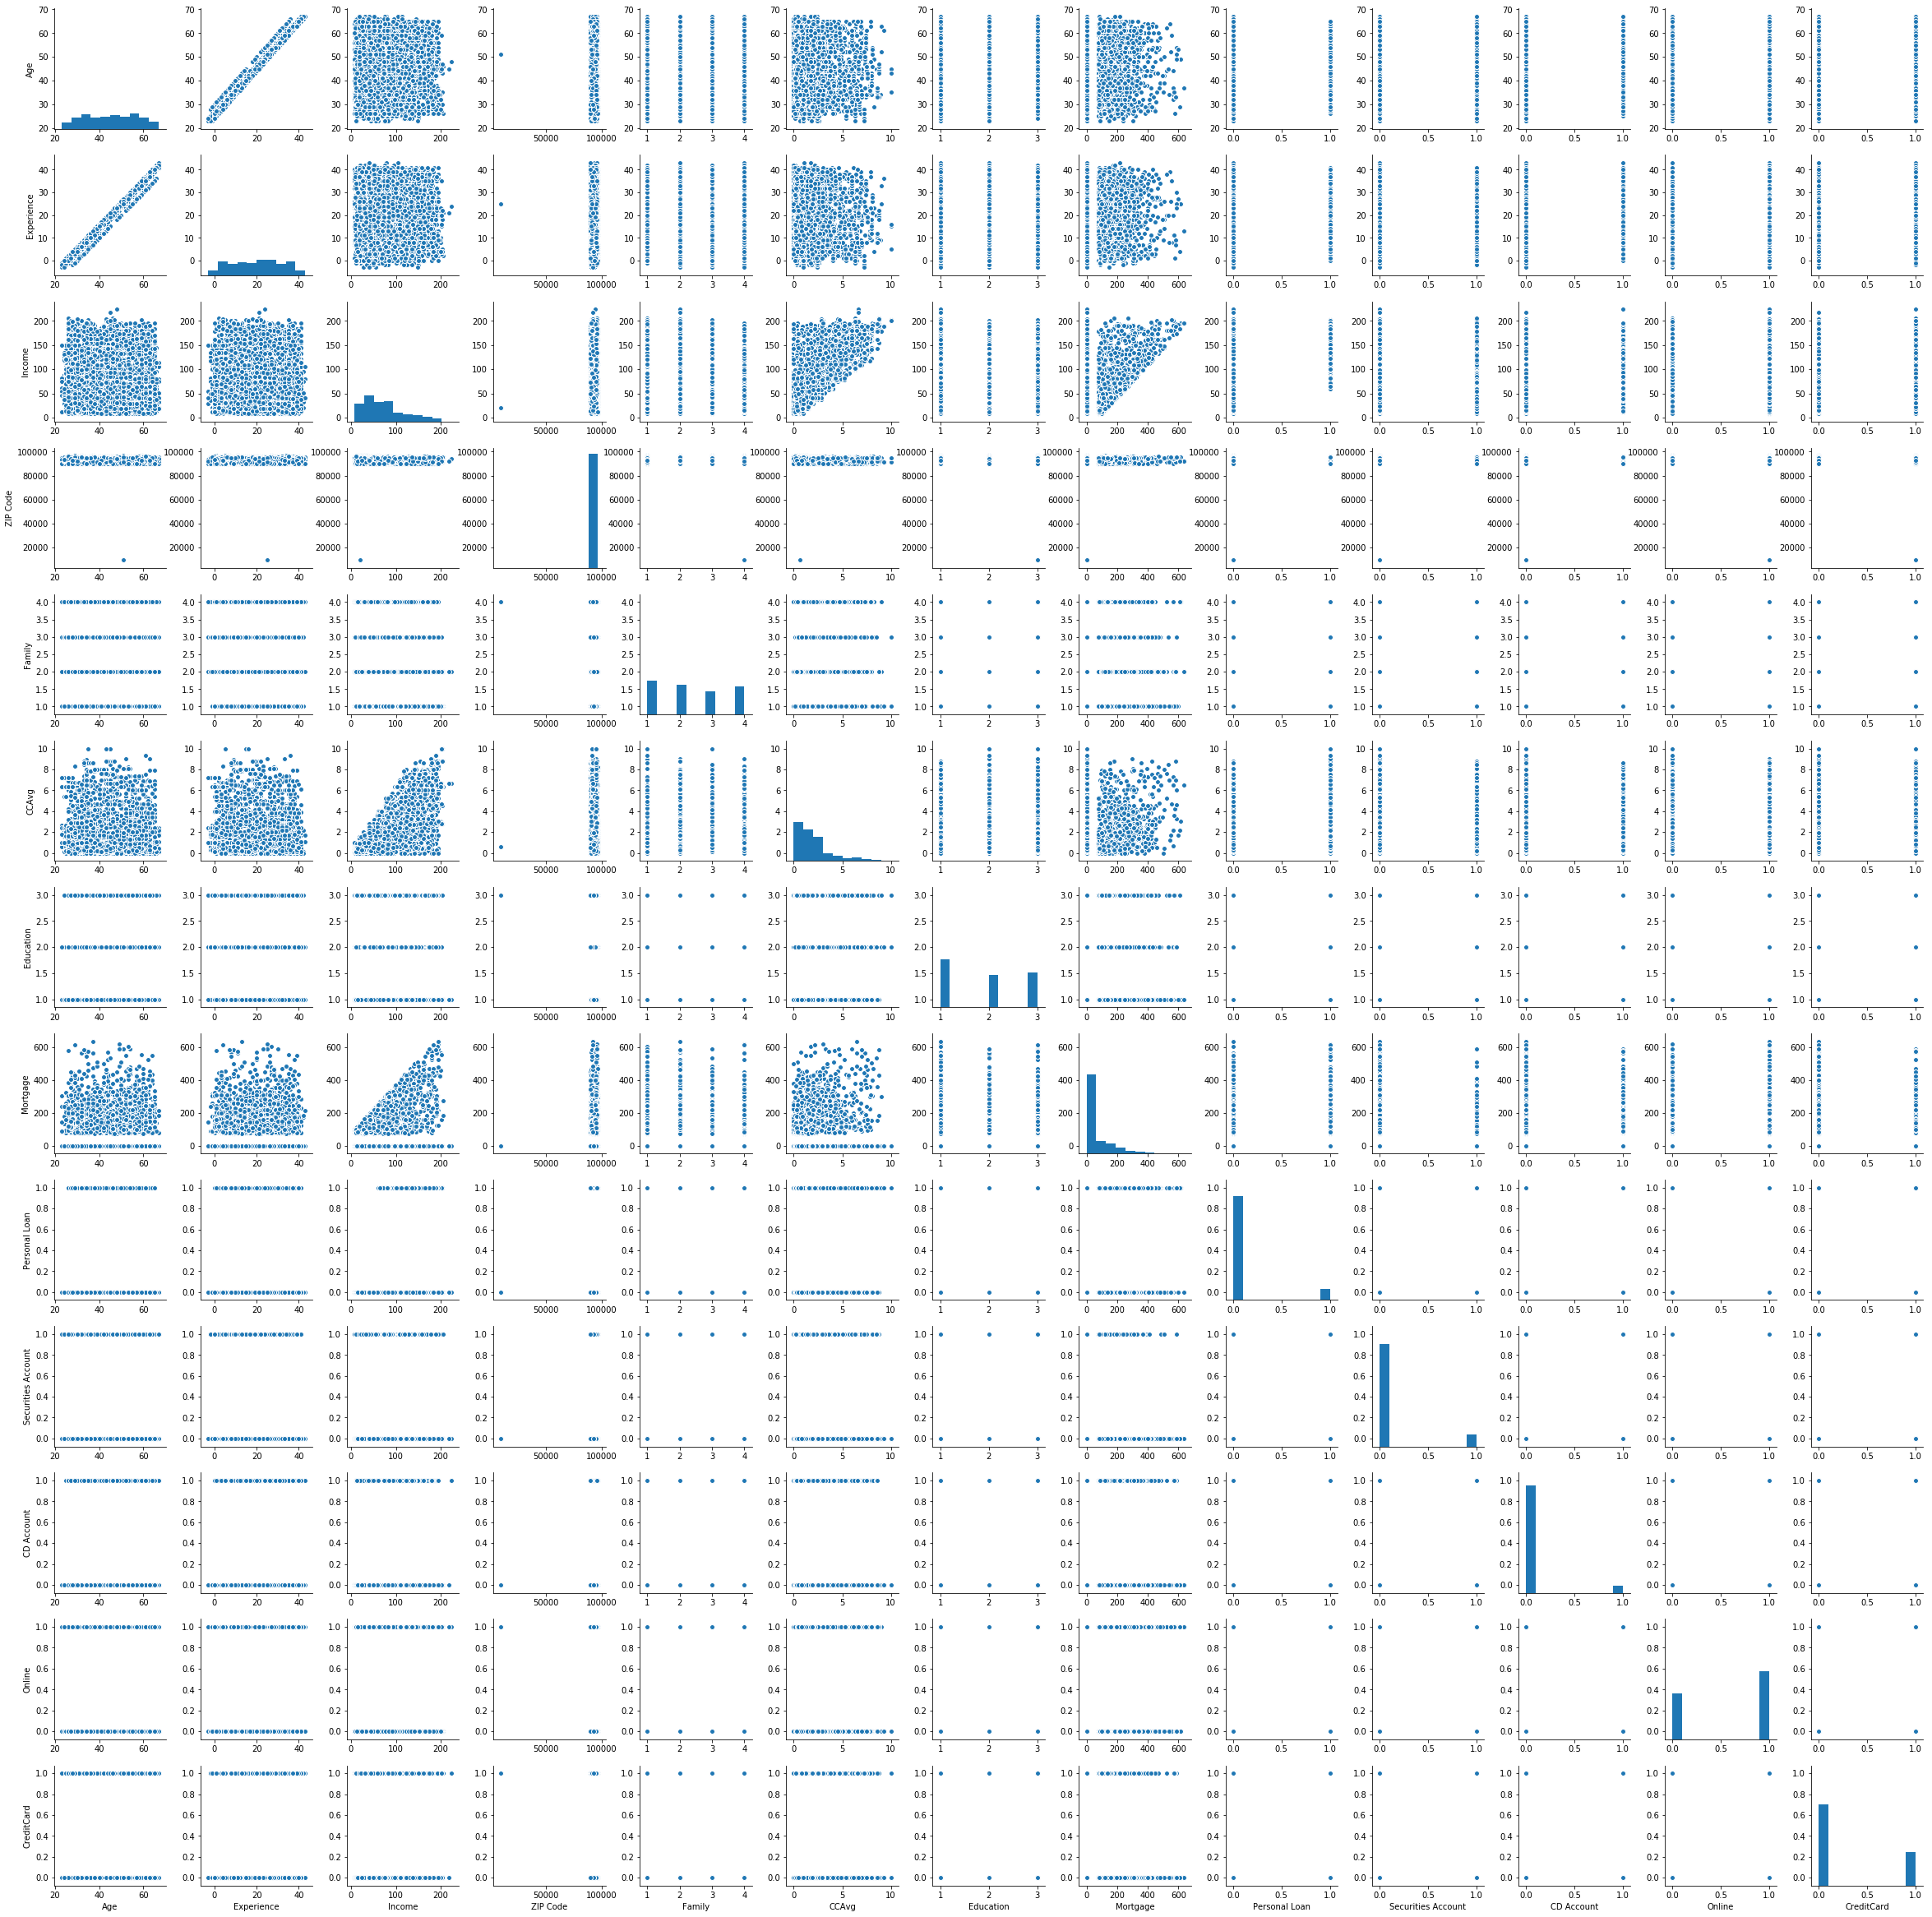

In [9]:
%matplotlib inline 
sns.pairplot(data)

In [10]:
# Plotting Box plots for attributes "Income","CCAvg" and "Mortgage":

/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


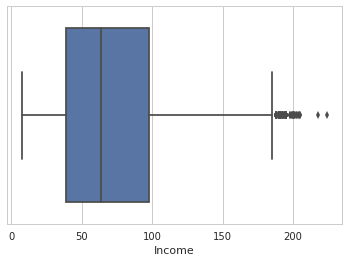

In [11]:
sns.set(style="whitegrid", color_codes=True)
px= sns.boxplot(x="Income", data= data)

/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


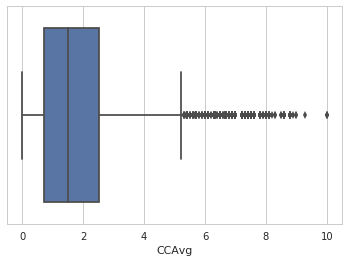

In [12]:
sns.set(style="whitegrid", color_codes=True)
px= sns.boxplot(x="CCAvg", data= data)

/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


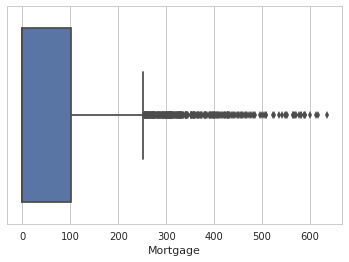

In [13]:
sns.set(style="whitegrid", color_codes=True)
px= sns.boxplot(x="Mortgage", data= data)

In [14]:
# From the Box plots it is evident that the skewed distribution in the attributes "Income","CCAvg" and "Mortgage" is not
# because of outliers. But the data itself is skewed.

In [15]:
# Checking the distribution in "Experience" column, to check negative values in distribution.

/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


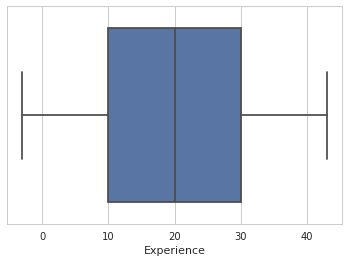

In [16]:
sns.set(style="whitegrid", color_codes=True)
px= sns.boxplot(x="Experience", data= data, hue=True)

# 2) studying data distribution in each attributes, Share your findings:

/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


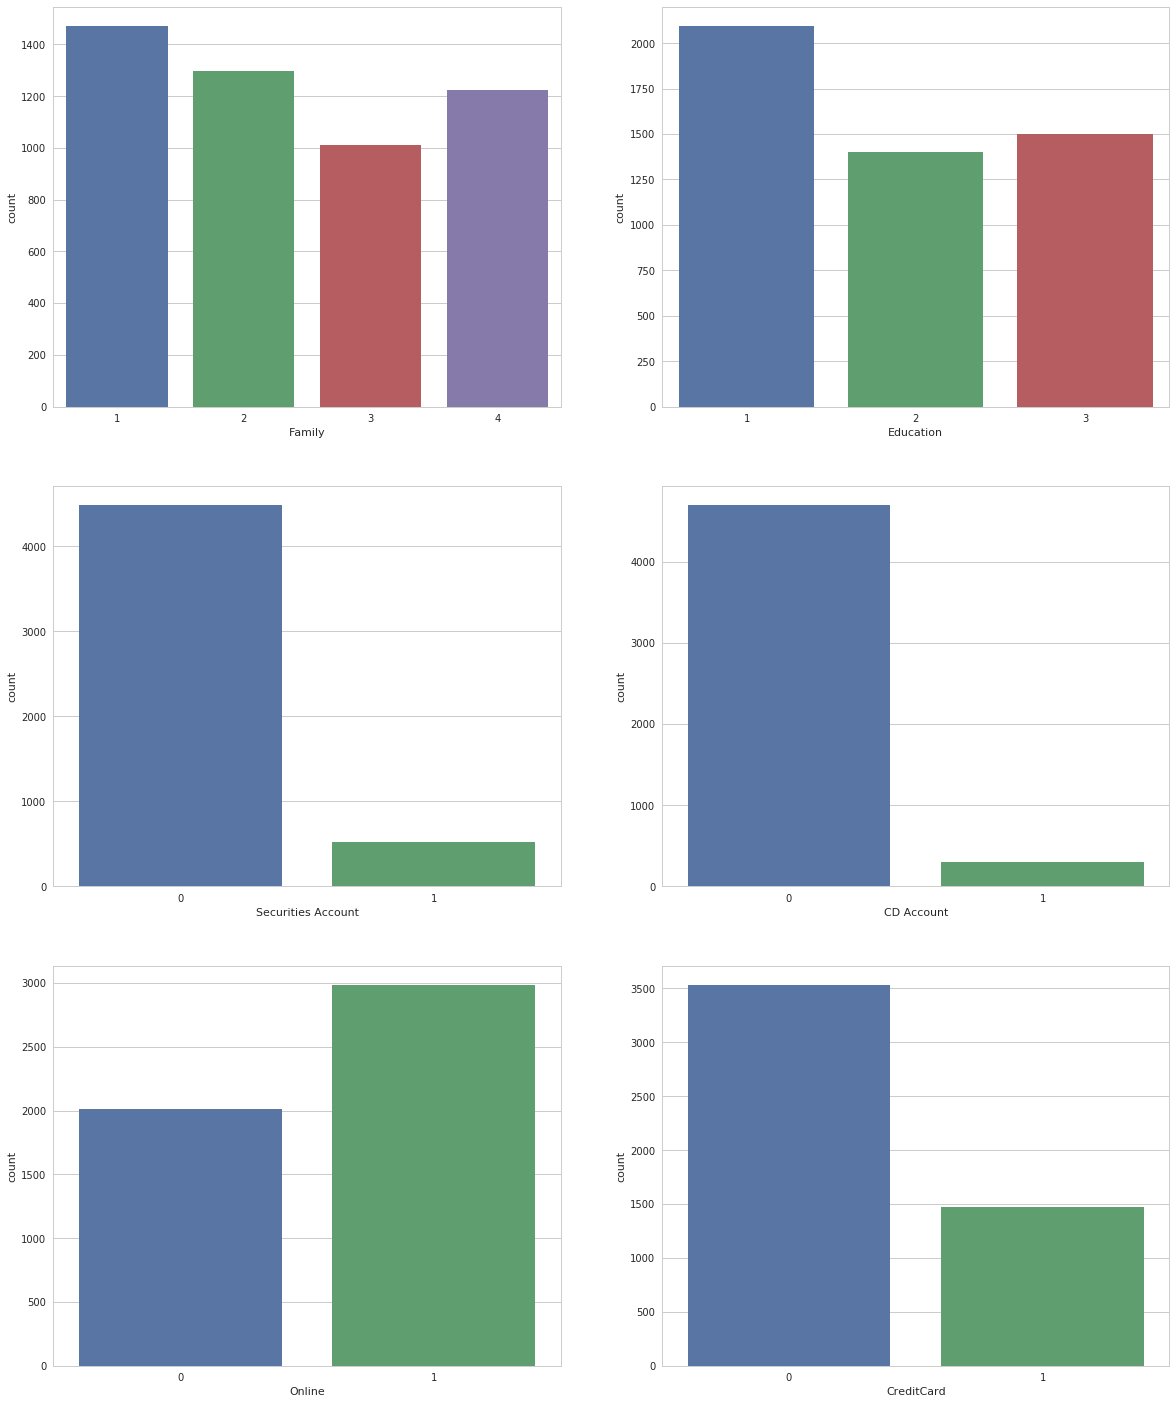

In [17]:
categorical = ["Family","Education","Securities Account","CD Account","Online","CreditCard"]
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 25))
for col, ax in zip(categorical[0:], axs.ravel()):
    sns.countplot(x=col, data=data, ax=ax)

# From the distribution of the independent attribute we can infer that:
    1) Majority of the banks customers are having a family size of 1
    2) Majority of banks customers are Undergraduates followed by Advanced/Professional and Graduates.
    3) Majority of banks existing customers are not holding "Securities account" and "CD account"
    4) Majority of existing customers are using Online banking facility
    5) Majority of banks customers do not have a Credit card.

# Observations based on the distribution of People who have taken the personal loan:

In [18]:
data_loan_yes = data.loc[data["Personal Loan"]==1]

/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


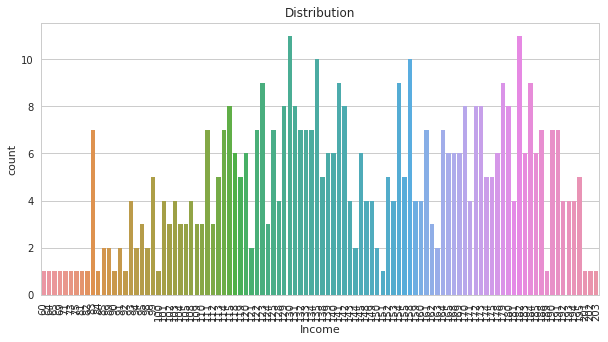

In [19]:
# Relationship between Income and People who have taken personal loan:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
sns.countplot(x='Income', data=data_loan_yes)
plt.xticks(rotation='vertical')
plt.title('Distribution')
plt.show()

In [20]:
data_loan_yes.Income.mean()

144.74583333333334

# Income > 144k are more likely to take Personal Loan

/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


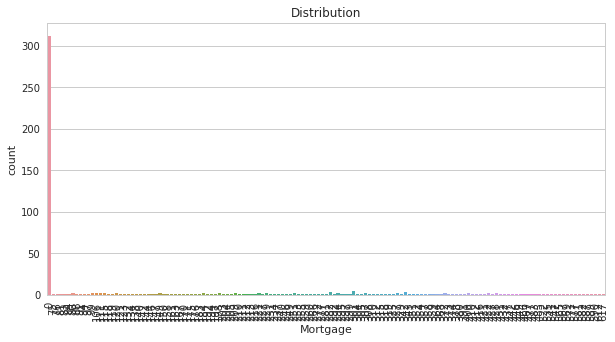

In [21]:
# Relationship between Mortgage and People who have taken personal loan:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
sns.countplot(x='Mortgage', data=data_loan_yes)
plt.xticks(rotation='vertical')
plt.title('Distribution')
plt.show()

# No Mortgage people are more prone to take personal loans

/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


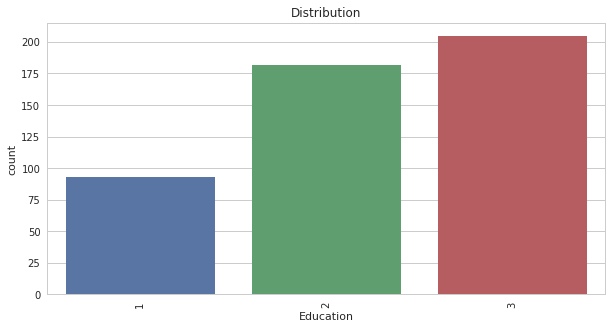

In [22]:
# Relationship between Education and People who have taken personal loan:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
sns.countplot(x='Education', data=data_loan_yes)
plt.xticks(rotation='vertical')
plt.title('Distribution')
plt.show()

# higher level of education are more likely to take personal loan followed by graduate

/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


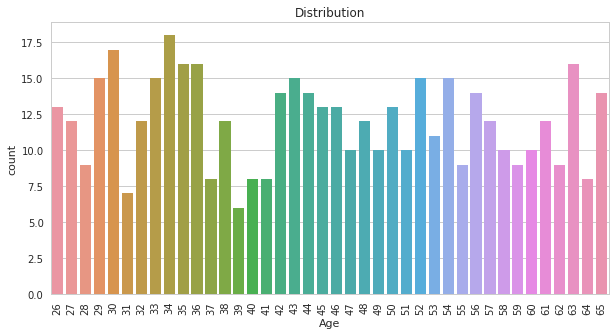

45.06666666666667

In [23]:
# Relationship between Age and People who have taken personal loan:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
sns.countplot(x='Age', data=data_loan_yes)
plt.xticks(rotation='vertical')
plt.title('Distribution')
plt.show()
data_loan_yes.Age.mean()

# Age on higer side are more likely to take personal loan. The Average age of people who have taken loan is 45 years.

# 3) Get the target column distribution. Your comments:

/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


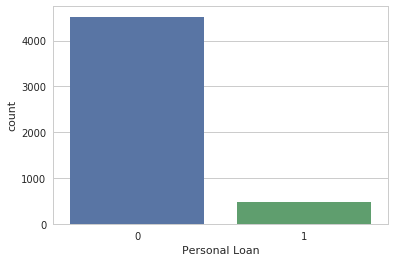

In [24]:
Target = data["Personal Loan"]
sns.countplot(x= Target, data=data)

# It is evident from the distribution of Target variable("Personal Loan") that approximately only 10% of the customers have accepted the personal Loan.

In [25]:
data.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052030,-0.050089,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015087,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


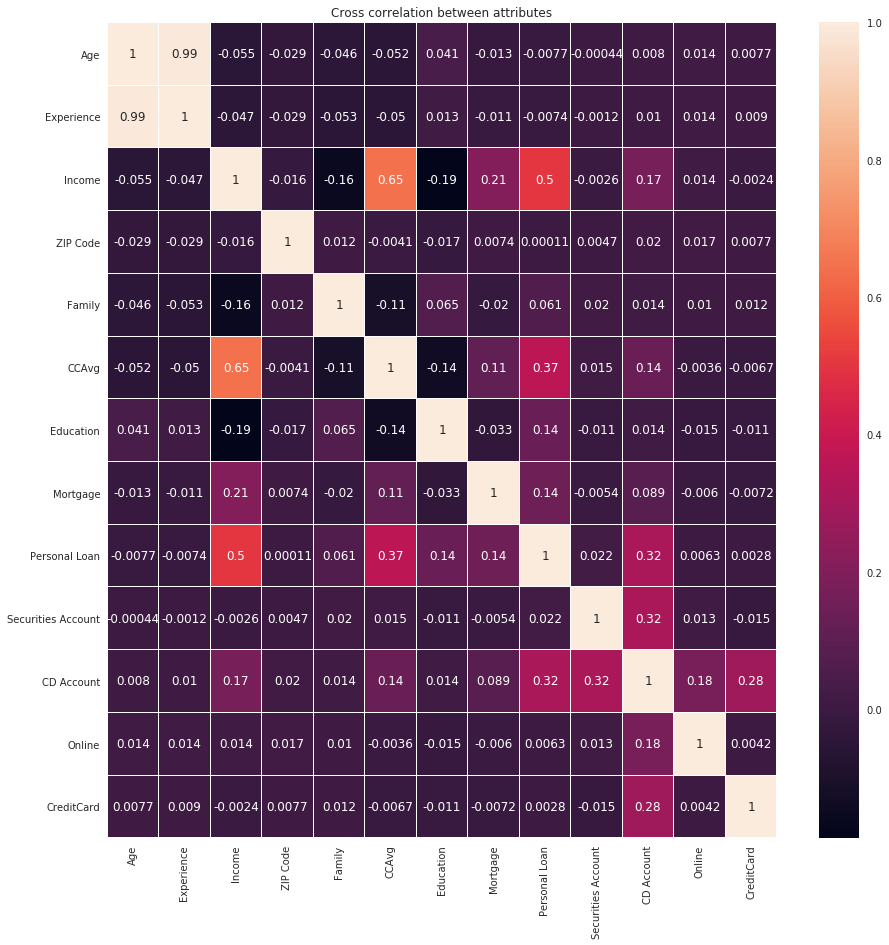

In [26]:
plt.figure(figsize=(15, 15))
ax = sns.heatmap(data.corr(), annot = True, fmt='.2g', linewidths = 0.01)
plt.title('Cross correlation between attributes')
plt.show()

#  From the correlation matrix we can infer that:
    1)The attributes "Experience" and "Age" are having high positive correlation (correlation cofficient = 0.99)
    2)The attributes "Income" and "CCAvg" has good positive correlation (correlation cofficient = 0.65)
    
    The attributes that are having good correlation with Target varibale("Personal Loan") are:
    1) Income (0.5)
    2) CCAvg (0.37)
    3) CD Account (0.32)
    
    The attribute "Zip Code" has having very least correlation with respect to Target variable (0.00011)

In [27]:
# Since "Zip code" is having least coefficient of correlation we can drop it from Dependant variables;
# Since "Experience" and "Age" are having high correlation of 0.99 we can drop either one of them from Dependant variables,Lets drop "Experience" since its having negative values.
data.drop(labels=['ZIP Code','Experience'],axis=1,inplace=True)
#data.drop(labels=['ID','ZIP Code','Experience'],axis=1,inplace=True)

In [28]:
data[~data.applymap(np.isreal).all(1)]

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [29]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.
data = pd.get_dummies(data,columns=['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard'],drop_first=True)

# 4) Split the data into training and test set in the ratio of 70:30 respectively.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [31]:
X = data.drop("Personal Loan_1",axis=1)
Y = data["Personal Loan_1"]

In [32]:
# Splitting Data into 70% Training data and 30% Testing Data:
x_train, x_test, y_train,  y_test = train_test_split(X, Y,train_size=0.7, test_size=0.3, random_state=0)
print(len(x_train))
print(len(x_test))

3500
1500


# Model-1 : Logistic Regression

In [33]:
# Lets use the classification algorithm "LogisticRegression":
from sklearn.linear_model import LogisticRegression
logisticregression = LogisticRegression()
Model1 = logisticregression.fit(x_train, y_train)

In [34]:
print("Model score on training : "+str(Model1.score(x_train,y_train)))
print("Model score on test : "+str(Model1.score(x_test,y_test)))

Model score on training : 0.9588571428571429
Model score on test : 0.9553333333333334


In [35]:
y1_predict = Model1.predict(x_test)
print("Mean Absolute Error : " + str(metrics.mean_absolute_error(y1_predict, y_test)))
print("Confusion Matrix/n")
print(metrics.confusion_matrix(y_test, y1_predict))
print( metrics.accuracy_score(y_test, y1_predict) )

Mean Absolute Error : 2.0766666666666667
Confusion Matrix/n
[[1360   12]
 [  55   73]]
0.9553333333333334


In [36]:
print(metrics.classification_report(y_test, y1_predict))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98      1372
          1       0.86      0.57      0.69       128

avg / total       0.95      0.96      0.95      1500



# Analyzing the confusion matrix:
True Positives (TP): we correctly predicted the people have taken Personal loan 73

True Negatives (TN): we correctly predicted the people who have not taken Personal loan 1360

False Positives (FP): we incorrectly predicted that people have taken loan (a "Type I error") 12 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that people have not taken loan (a "Type II error") 55 Falsely predict negative Type II error

# Model-2: K-Nearset neighbor's

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
kNeighborsClassifier = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance')

In [39]:
Model2 = kNeighborsClassifier.fit(x_train, y_train)

In [40]:
print("Model score on training : "+str(Model2.score(x_train,y_train)))
print("Model score on test : "+str(Model2.score(x_test,y_test)))

Model score on training : 1.0
Model score on test : 0.9113333333333333


In [41]:
y2_predict = Model2.predict(x_test)
print("Mean Absolute Error : " + str(metrics.mean_absolute_error(y2_predict, y_test)))
print("Confusion Matrix/n")
print(metrics.confusion_matrix(y_test, y2_predict))
print( metrics.accuracy_score(y_test, y2_predict) )

Mean Absolute Error : 8.047333333333333
Confusion Matrix/n
[[1325   47]
 [  86   42]]
0.9113333333333333


In [42]:
print(metrics.classification_report(y_test, y2_predict))

             precision    recall  f1-score   support

          0       0.94      0.97      0.95      1372
          1       0.47      0.33      0.39       128

avg / total       0.90      0.91      0.90      1500



# Analyzing the confusion matrix:
True Positives (TP): we correctly predicted the people have taken Personal loan 42

True Negatives (TN): we correctly predicted the people who have not taken Personal loan 1325

False Positives (FP): we incorrectly predicted that people have taken loan (a "Type I error") 47 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that people have not taken loan (a "Type II error") 86 Falsely predict negative Type II error

# Model-3: Naive bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
gaussianNB = GaussianNB()

In [45]:
Model3 = gaussianNB.fit(x_train, y_train)

In [46]:
print("Model score on training : "+str(Model3.score(x_train,y_train)))
print("Model score on test : "+str(Model3.score(x_test,y_test)))

Model score on training : 0.8831428571428571
Model score on test : 0.8886666666666667


In [47]:
y3_predict = Model3.predict(x_test)
print("Mean Absolute Error : " + str(metrics.mean_absolute_error(y3_predict, y_test)))
print("Confusion Matrix/n")
print(metrics.confusion_matrix(y_test, y3_predict))
print( metrics.accuracy_score(y_test, y3_predict) )

Mean Absolute Error : 19.584666666666667
Confusion Matrix/n
[[1257  115]
 [  52   76]]
0.8886666666666667


In [48]:
print(metrics.classification_report(y_test, y3_predict))

             precision    recall  f1-score   support

          0       0.96      0.92      0.94      1372
          1       0.40      0.59      0.48       128

avg / total       0.91      0.89      0.90      1500



# Analyzing the confusion matrix:
True Positives (TP): we correctly predicted the people have taken Personal loan as 76

True Negatives (TN): we correctly predicted the people who have not taken Personal loan as 1257

False Positives (FP): we incorrectly predicted that people have taken loan (a "Type I error") 115 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that people have not taken loan (a "Type II error") 52 Falsely predict negative Type II error

# Model-4: Decision tree classifier:

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
decisionTreeClassifier = DecisionTreeClassifier(criterion = 'entropy' )

In [51]:
Model4 = decisionTreeClassifier.fit(x_train, y_train)

In [52]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(Model4, out_file=Credit_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))

Credit_Tree_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(Model4.feature_importances_, columns = ["Imp"], index = x_train.columns))


                           Imp
Age                   0.029940
Income                0.531396
CCAvg                 0.108366
Mortgage              0.004972
Family_2              0.006239
Family_3              0.051021
Family_4              0.068375
Education_2           0.116647
Education_3           0.065913
Securities Account_1  0.001969
CD Account_1          0.013887
Online_1              0.000000
CreditCard_1          0.001274


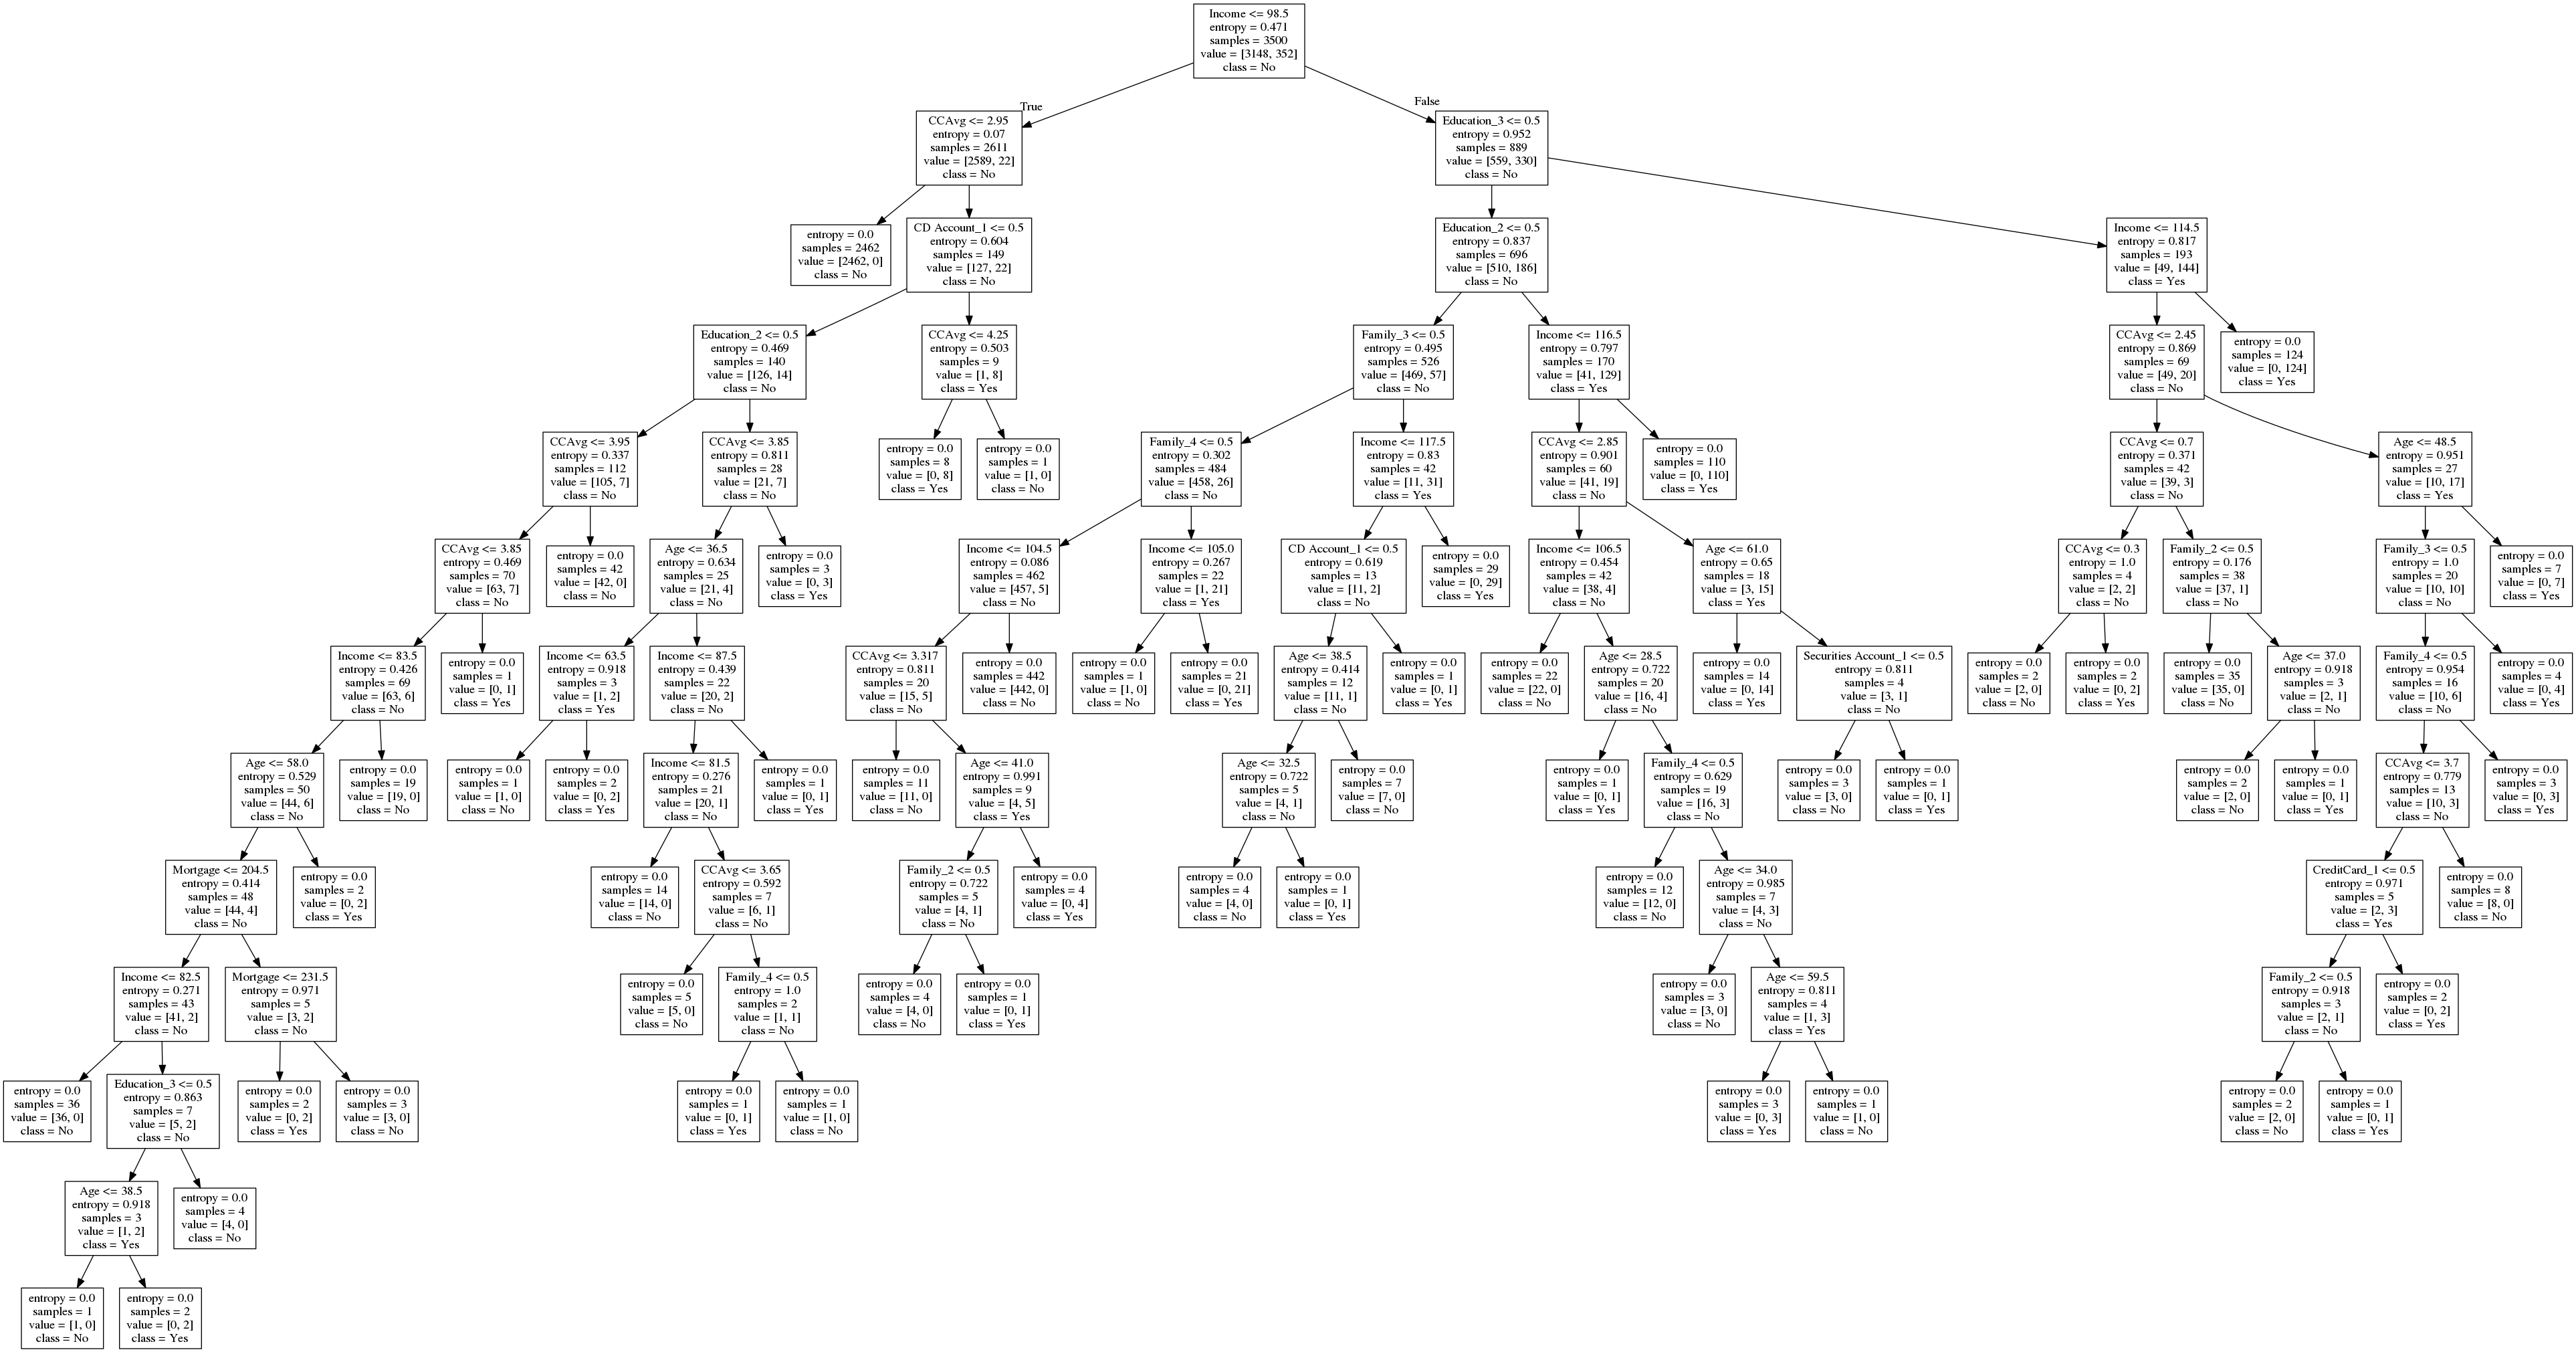

In [53]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view 
#or create a .png as below

system("dot -Tpng credit_tree.dot -o credit_tree.png")
Image("credit_tree.png")

In [54]:
print("Model score on training : "+str(Model4.score(x_train,y_train)))
print("Model score on test : "+str(Model4.score(x_test,y_test)))

Model score on training : 1.0
Model score on test : 0.9866666666666667


In [55]:
y4_predict = Model4.predict(x_test)
print("Mean Absolute Error : " + str(metrics.mean_absolute_error(y4_predict, y_test)))
print("Confusion Matrix/n")
print(metrics.confusion_matrix(y_test, y4_predict))
print( metrics.accuracy_score(y_test, y4_predict) )

Mean Absolute Error : 1.368
Confusion Matrix/n
[[1364    8]
 [  12  116]]
0.9866666666666667


In [56]:
print(metrics.classification_report(y_test, y4_predict))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1372
          1       0.94      0.91      0.92       128

avg / total       0.99      0.99      0.99      1500



# Analyzing the confusion matrix:
True Positives (TP): we correctly predicted the people have taken Personal loan as 116

True Negatives (TN): we correctly predicted the people who have not taken Personal loan as 1365

False Positives (FP): we incorrectly predicted that people have taken loan (a "Type I error") 7 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that people have not taken loan (a "Type II error") 12 Falsely predict negative Type II error

# Conclusion : 

From the above analysis all models overall accuracy is good, But when we look at precision and recall value, Recall accuracy is low,
Which indicated that our models are overfitting on training data due to imbalance dataset.
Even without any model one can say that the given test set belongs to Majority class with 90% confidence
### But Still Decesion tree models accuracy is good in terms of overall,precesion and recall as trees won't effect much from imbalance data

### From the data set , we have only 480 records which are positive and rest as negetive .
### This is Imbalanced Class data with 1:9 ratio

In [57]:
# Let us look at the target column which is 'Personal Loan' to understand how the data is distributed amongst the various values
# Most are not negatives. The ratio is almost 1:9 in favor or class 0.  The model's ability to predict class 0 will 
# be better than predicting class 1. 
data.groupby(["Personal Loan_1"]).count()

,Age,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
Personal Loan_1,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


We have many ways to handle to imbalance data sets we are considering 2 methods 
### Case 1 : Changing model parameters or using Ensemble techniques with trees.
### Case 2 : Upsampling of minority class data

# Case 1 :

#                                      Regularising the Decision Tree

In [58]:
#dt_model = DecisionTreeClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5 )
#dt_model.fit(train_set, train_labels)

model5 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
model5.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

train_char_label = ['No', 'Yes']
RegCredit_Tree_File = open('Regcredit_tree.dot','w')
dot_data = tree.export_graphviz(model5, out_file=RegCredit_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))

RegCredit_Tree_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model5.feature_importances_, columns = ["Imp"], index = x_train.columns))


                           Imp
Age                   0.003825
Income                0.555749
CCAvg                 0.105409
Mortgage              0.000000
Family_2              0.000000
Family_3              0.053468
Family_4              0.067705
Education_2           0.129527
Education_3           0.070976
Securities Account_1  0.000000
CD Account_1          0.013341
Online_1              0.000000
CreditCard_1          0.000000


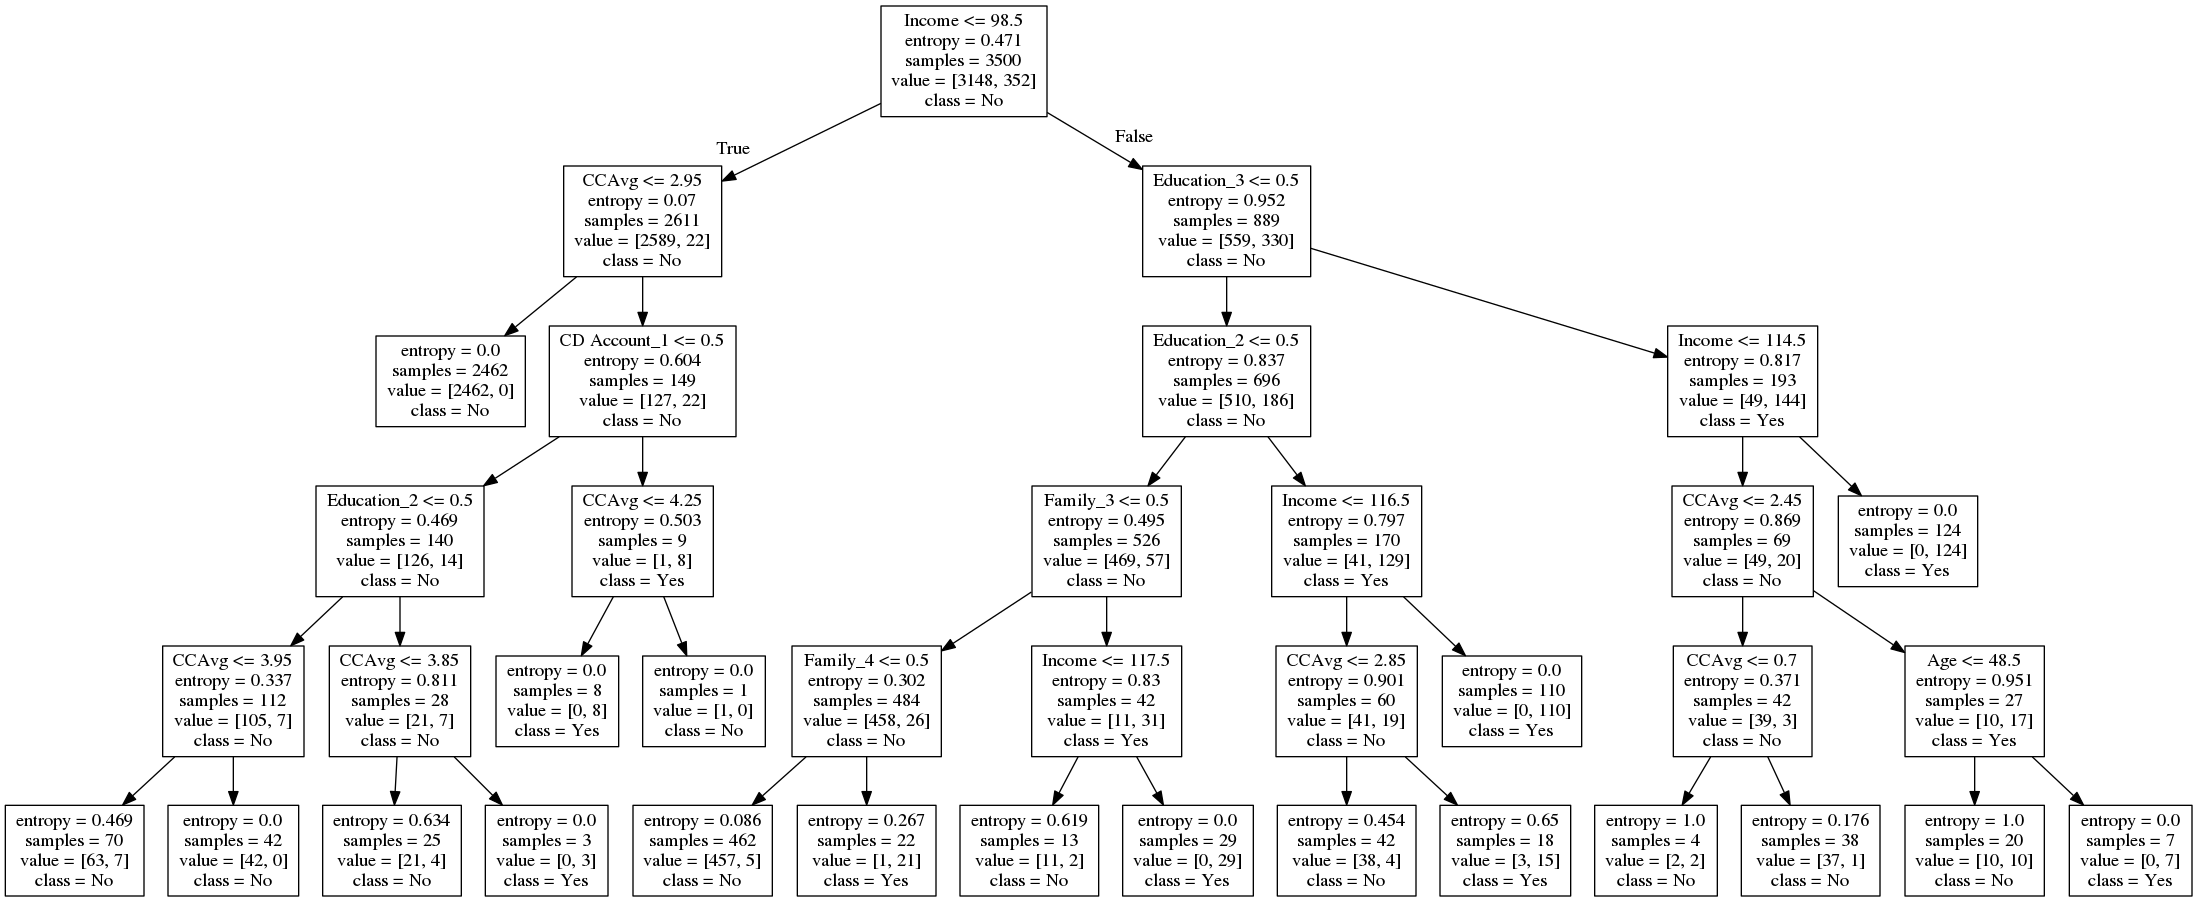

In [60]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view 
#or create a .png as below

system("dot -Tpng Regcredit_tree.dot -o Regcredit_tree.png")
Image("Regcredit_tree.png")

In [61]:
print("Model score on training : "+str(model5.score(x_train,y_train)))
print("Model score on test : "+str(model5.score(x_test,y_test)))

Model score on training : 0.9888571428571429
Model score on test : 0.988


In [62]:
y5_predict = model5.predict(x_test)
print("Mean Absolute Error : " + str(metrics.mean_absolute_error(y5_predict, y_test)))
print("Confusion Matrix/n")
print(metrics.confusion_matrix(y_test, y5_predict))
print( metrics.accuracy_score(y_test, y5_predict) )

Mean Absolute Error : 0.6893333333333334
Confusion Matrix/n
[[1368    4]
 [  14  114]]
0.988


In [63]:
print(metrics.classification_report(y_test, y5_predict))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1372
          1       0.97      0.89      0.93       128

avg / total       0.99      0.99      0.99      1500



# Analyzing the confusion matrix:
True Positives (TP): we correctly predicted the people have taken Personal loan as 116

True Negatives (TN): we correctly predicted the people who have not taken Personal loan as 1368

False Positives (FP): we incorrectly predicted that people have taken loan (a "Type I error") 4 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that people have not taken loan (a "Type II error") 12 Falsely predict negative Type II error

In [64]:
#Validating model with K-Fold Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model5, x_train, y_train, cv=5)
print(scores)

[0.98002853 0.98145506 0.98714286 0.98998569 0.98283262]


# Gradient Boosting Models with XGBoost

### XGBoost takes care of Imbalance in datasets and helps in prediction accuracy on unseen data

In [65]:
from xgboost import XGBClassifier

model6 = XGBClassifier(n_estimators=1000, learning_rate=0.05)
# Add silent=True to avoid printing out updates with each cycle
model6.fit(x_train, y_train,verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [66]:
print("Model score on training : "+str(model6.score(x_train,y_train)))
print("Model score on test : "+str(model6.score(x_test,y_test)))

Model score on training : 0.9994285714285714
Model score on test : 0.9833333333333333


/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [67]:
y6_predict = model6.predict(x_test)
print("Mean Absolute Error : " + str(metrics.mean_absolute_error(y6_predict, y_test)))
print("Confusion Matrix/n")
print(metrics.confusion_matrix(y_test, y6_predict))
print( metrics.accuracy_score(y_test, y6_predict) )

Mean Absolute Error : 1.0326666666666666
Confusion Matrix/n
[[1366    6]
 [  19  109]]
0.9833333333333333


/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [68]:
print(metrics.classification_report(y_test, y6_predict))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1372
          1       0.95      0.85      0.90       128

avg / total       0.98      0.98      0.98      1500



In [69]:
#Validating model with K-Fold Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model6, x_train, y_train, cv=5)
print(scores)

/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of

[0.98573466 0.9871612  0.98571429 0.98569385 0.981402  ]


/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Case 2:

In [70]:
# Therefore, if we were to always predict 0 - people who will not take loan, we'd achieve an accuracy more than 90%.
# On the contrary , for people who will take loan , hardly we will achieve 10% accuracy

In [71]:
# Up Sampling is one technique which can be used to make this data unbiased

In [72]:
# Separate majority and minority classes
df_majority = data[data['Personal Loan_1']==0]
df_minority = data[data['Personal Loan_1']==1]

In [73]:
from  sklearn.utils import resample
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=4520,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['Personal Loan_1'].value_counts()

1    4520
0    4520
Name: Personal Loan_1, dtype: int64

In [74]:
Sampled_X = df_upsampled.drop("Personal Loan_1",axis=1)
Sampled_Y = df_upsampled["Personal Loan_1"]

In [75]:
x_train, x_test, y_train,  y_test = train_test_split(Sampled_X, Sampled_Y,train_size=0.7, test_size=0.3, random_state=0)

In [76]:
# Lets use the classification algorithm "LogisticRegression":
logisticregressionOnSampledData = LogisticRegression()
Model7 = logisticregressionOnSampledData.fit(x_train, y_train)

In [77]:
print("Model score on training : "+str(Model7.score(x_train,y_train)))
print("Model score on test : "+str(Model7.score(x_test,y_test)))

Model score on training : 0.9054993678887484
Model score on test : 0.8971238938053098


In [78]:
y7_predict = Model7.predict(x_test)
print("Mean Absolute Error : " + str(metrics.mean_absolute_error(y7_predict, y_test)))
print("Confusion Matrix/n")
print(metrics.confusion_matrix(y_test, y7_predict))
print( metrics.accuracy_score(y_test, y7_predict) )

Mean Absolute Error : 12.46570796460177
Confusion Matrix/n
[[1220  132]
 [ 147 1213]]
0.8971238938053098


In [79]:
print(metrics.classification_report(y_test, y7_predict))

             precision    recall  f1-score   support

          0       0.89      0.90      0.90      1352
          1       0.90      0.89      0.90      1360

avg / total       0.90      0.90      0.90      2712



In [80]:
#Validating model with K-Fold Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Model7, x_train, y_train, cv=5)
print(scores)

[0.90916272 0.91153239 0.90995261 0.90197628 0.89802372]


### Need to repeat the process on KNN, Naive Base and Decesion Tree

# 6 Explain why you chose one model over the other 

Decession Tree is best suited model for the given dataset over other models.
Because of imbalance in dataset, Decesion Tree classification is not effected much as compared to Logistic, KNN and Naive Base.

There are many techniques to use for this kind of data set.
We have taken 2 cases: 1) By Changing Model parameters 2) Upsampling of Minarity Class data.

We can see the Overall accuracy, Precesion , Recall and f1-score are good in Decesion Tree , XGBClassifier and Logistic on Upsampled data. 

In [81]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

LR: 0.957600 (0.005276)
LDA: 0.946400 (0.006917)
KNN: 0.904400 (0.010151)
CART: 0.983400 (0.003904)
NB: 0.883000 (0.009220)
SVM: 0.905200 (0.011496)
RegCART: 0.981400 (0.003470)


/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of

XGB: 0.987400 (0.003800)


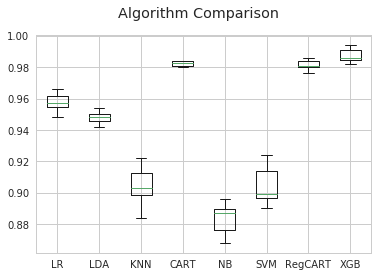

In [84]:
models = []
models.append(('LR', Model1))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', Model2))
models.append(('CART', Model4))
models.append(('NB', Model3))
models.append(('SVM', SVC()))
models.append(('RegCART', model5))
models.append(('XGB', model6))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()